# Crop image into pieces of rectangles

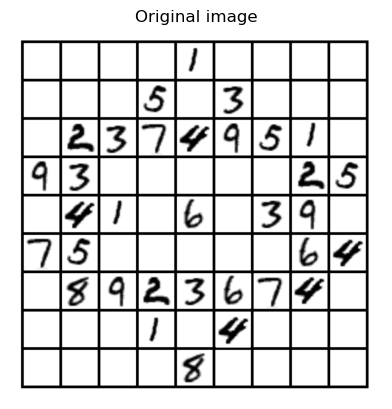

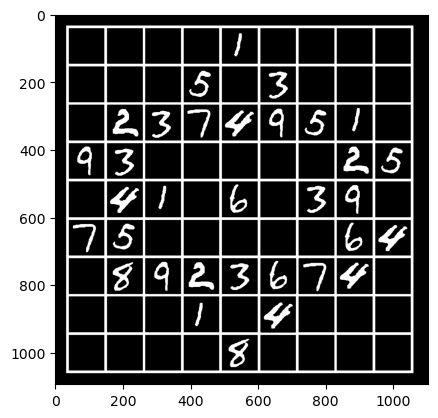

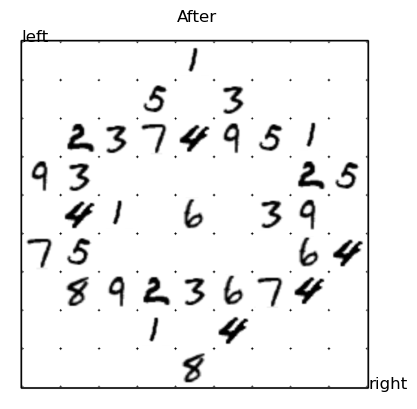

In [1]:
import cv2
import matplotlib.pyplot as plt
import math
import numpy as np

# load original image
image = cv2.imread("images/image_1.png", cv2.IMREAD_GRAYSCALE)
plt.axis("off")
plt.title("Original image")
plt.imshow(image, cmap = "gray")
plt.show()

# use threshold to make gray scale image into binary image
_, thresh = cv2.threshold(image, 100, 255, 1)
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
plt.imshow(thresh, cmap = "gray")
plt.show()

# record all the rectangles contruct sudoku
x1 = y1 = math.inf
x2 = y2 = -math.inf
for contour in contours:
    # make contour into polygon
    approx = cv2.approxPolyDP(contour, 0.01 * cv2.arcLength(contour, True), True)
    
    # abstract reatangle
    if (len(approx) == 4):
        cv2.drawContours(image, [contour], 0, (255, 0, 0), 5)
        
        # abstract the upper left point and lower right point
        length = max([a[0][0]] for a in approx)[0] - min([a[0][0]] for a in approx)[0]
        width = max([a[0][1]] for a in approx)[0] - min([a[0][1]] for a in approx)[0]
        if (length > 10 and width > 10):
            for a in approx:
                x1 = min(a[0][0], x1)
                y1 = min(a[0][1], y1)
                x2 = max(a[0][0], x2)
                y2 = max(a[0][1], y2)

# display the result
cv2.rectangle(image, (x1, y1), (x2, y2), (0, 0, 255), 3)
plt.text(x1, y1, "left", fontsize = 12)
plt.text(x2, y2, "right", fontsize = 12)
plt.imshow(image, cmap = "gray")
plt.title("After")
plt.axis("off")
plt.show()

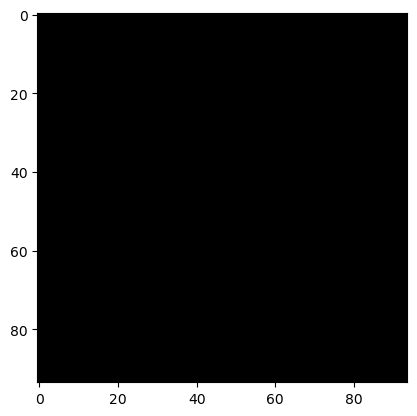

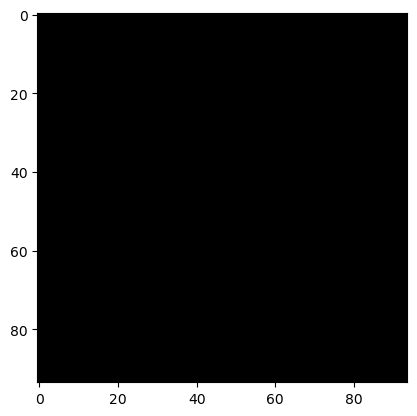

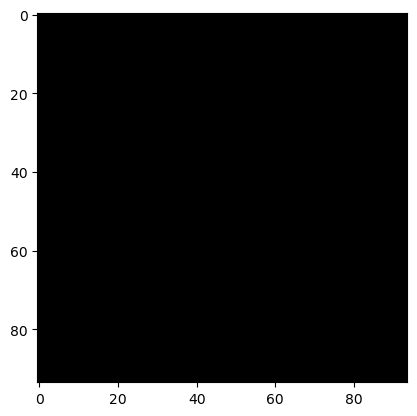

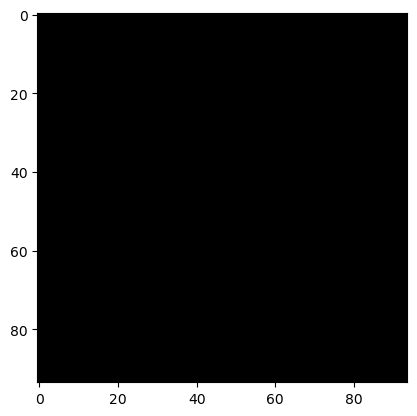

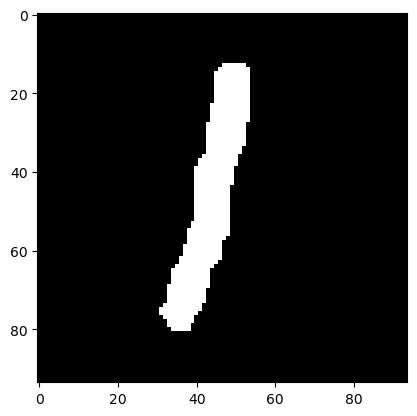

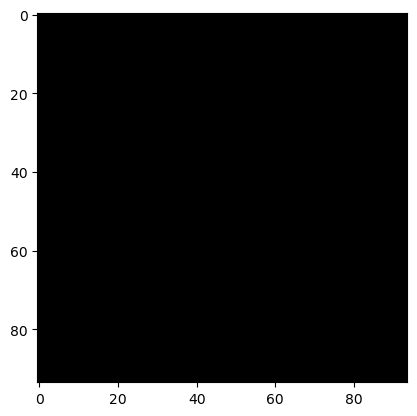

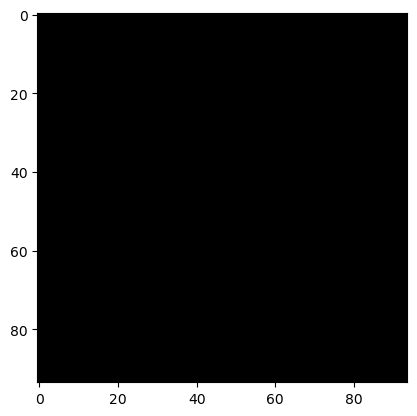

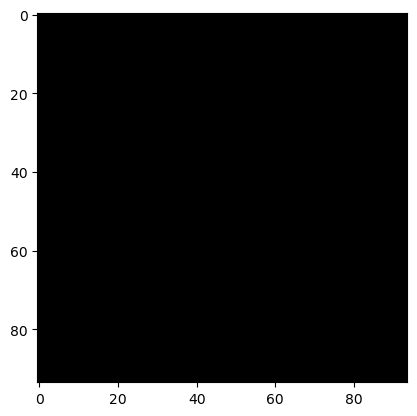

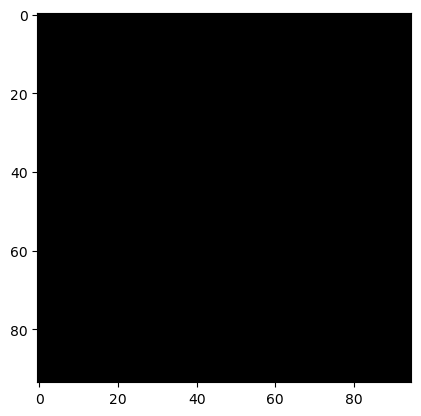

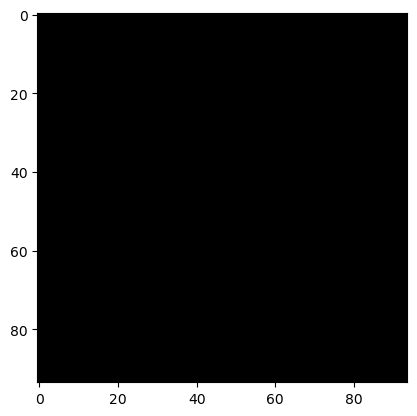

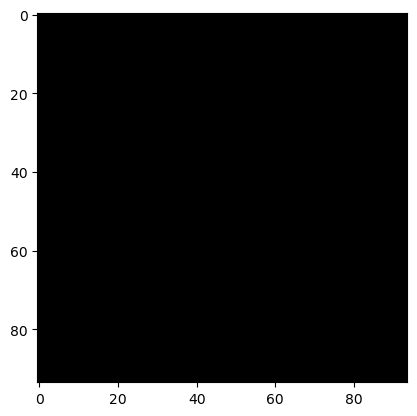

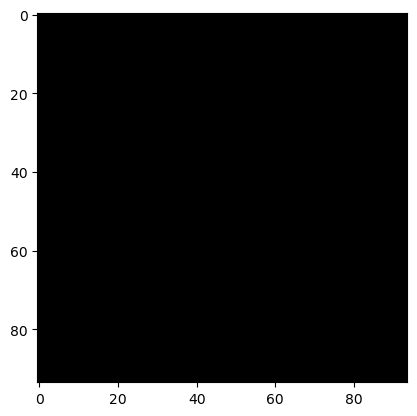

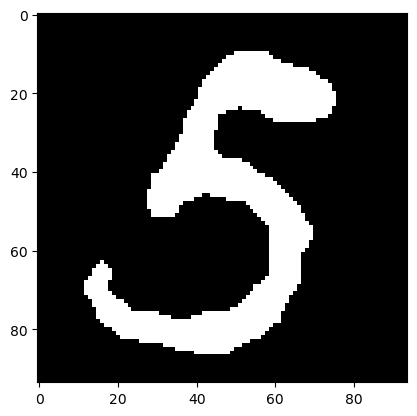

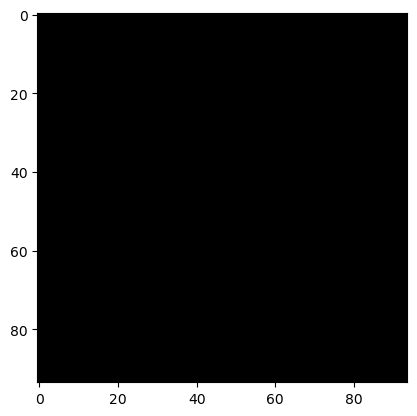

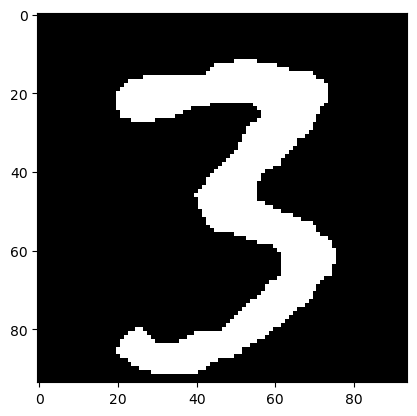

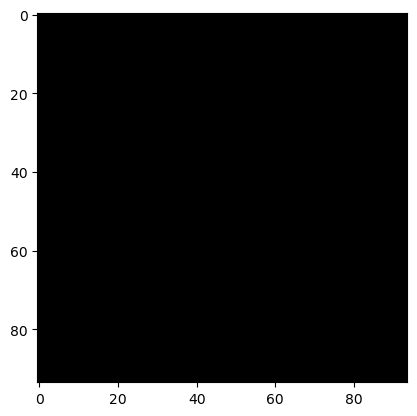

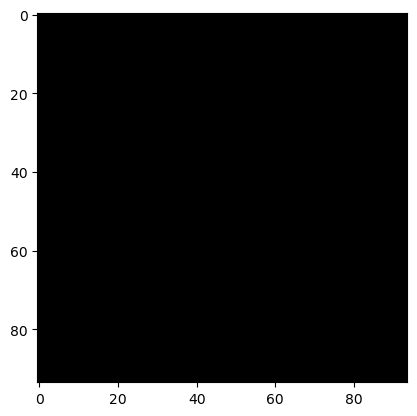

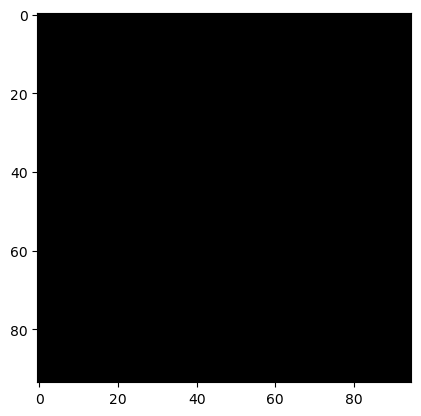

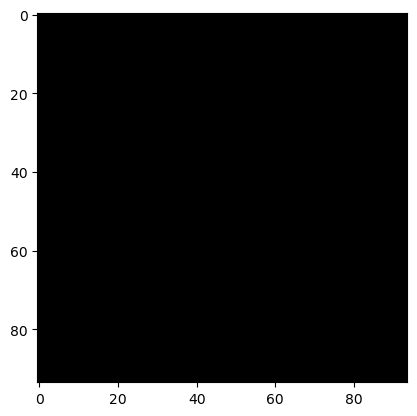

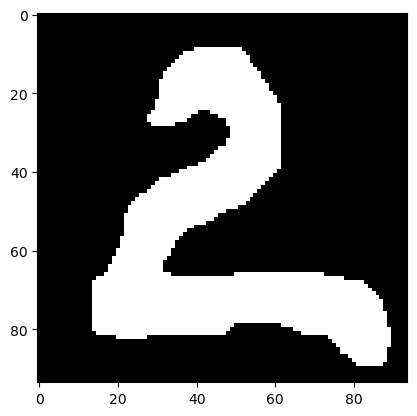

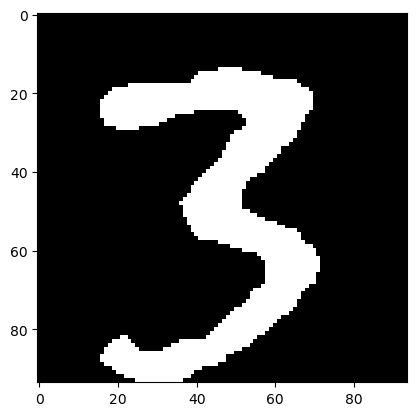

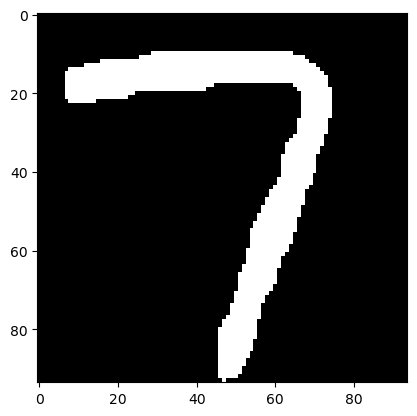

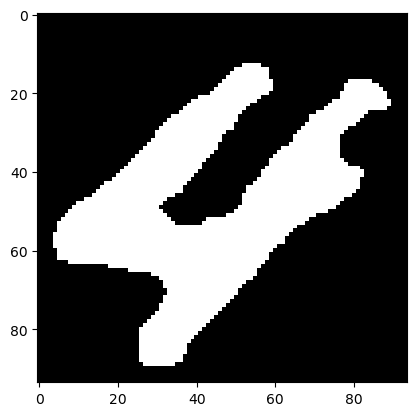

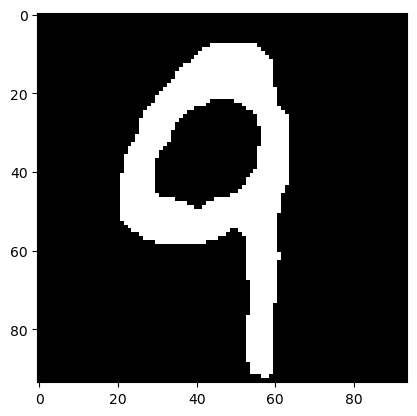

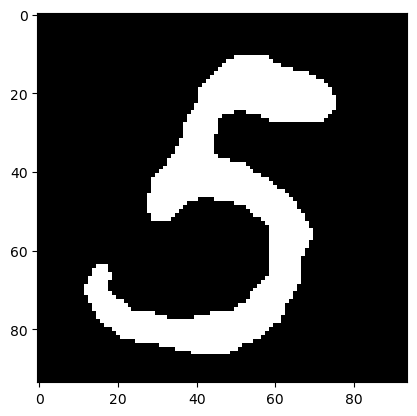

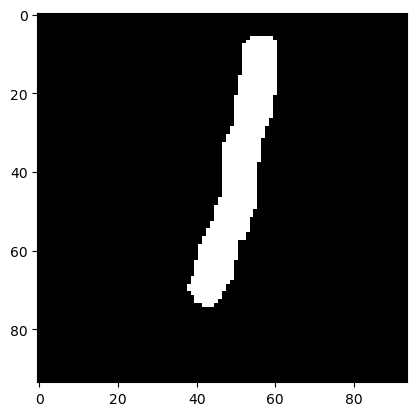

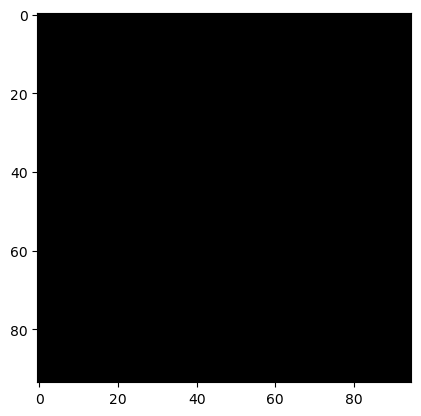

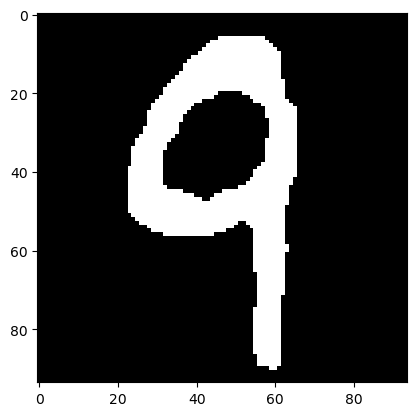

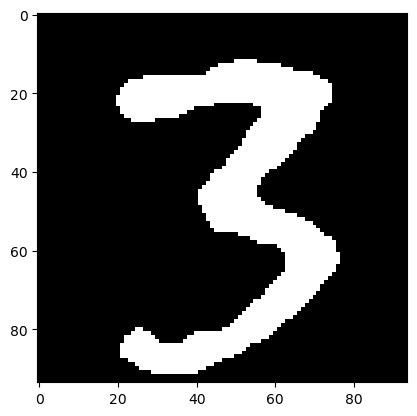

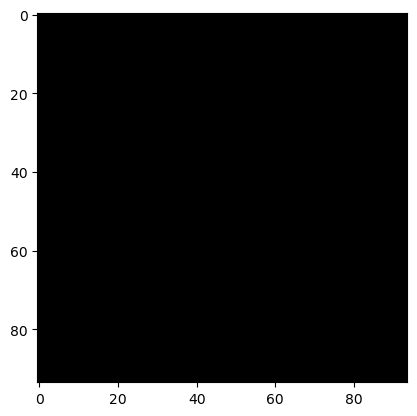

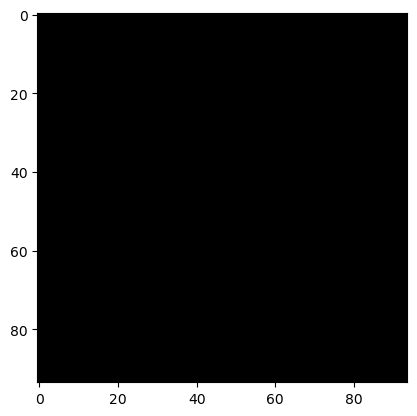

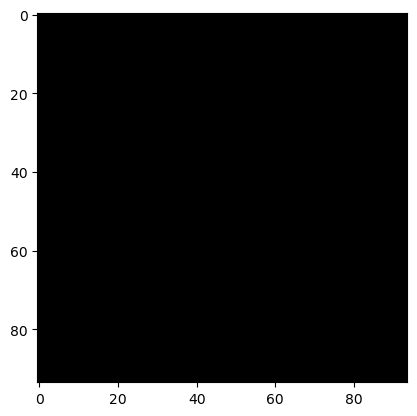

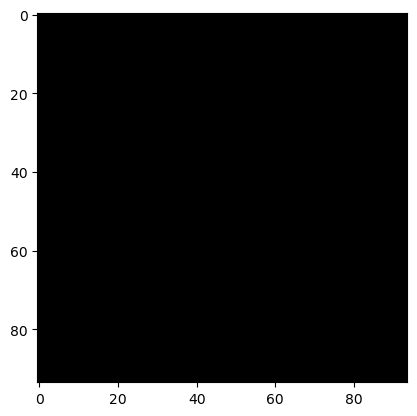

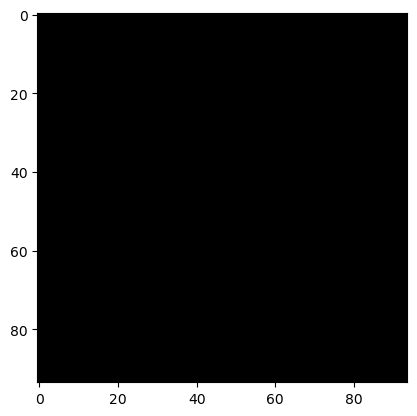

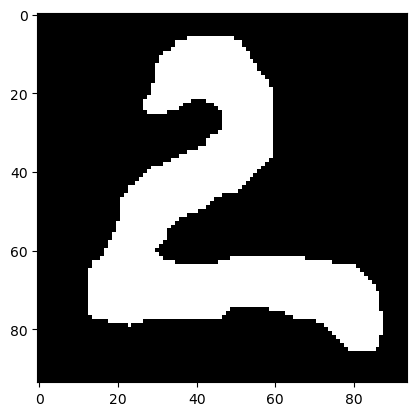

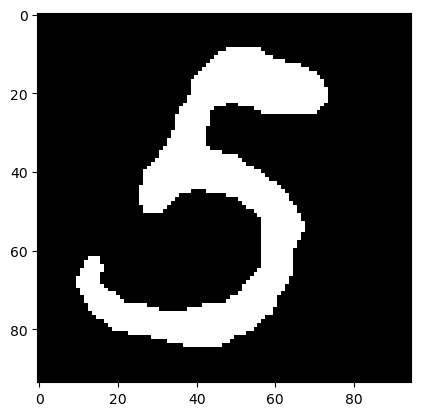

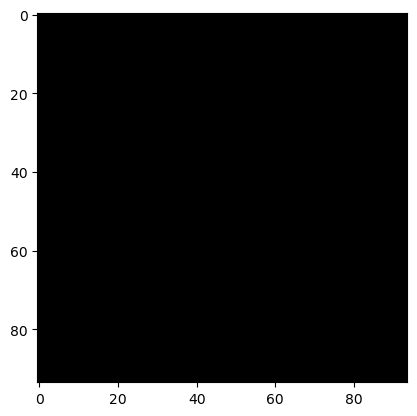

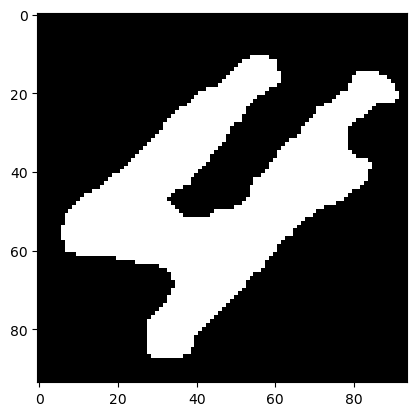

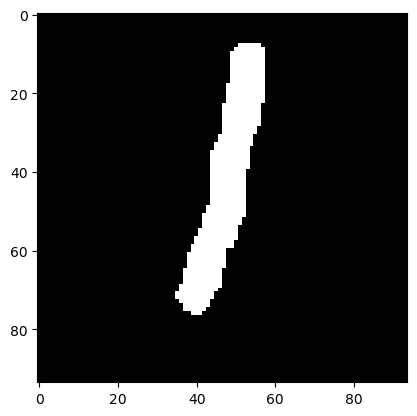

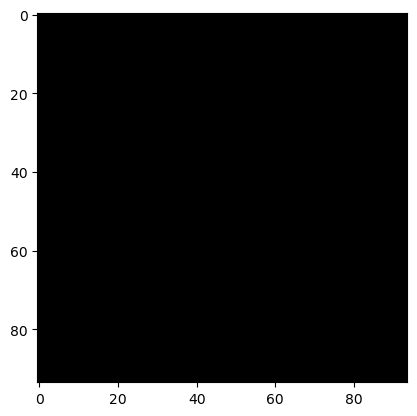

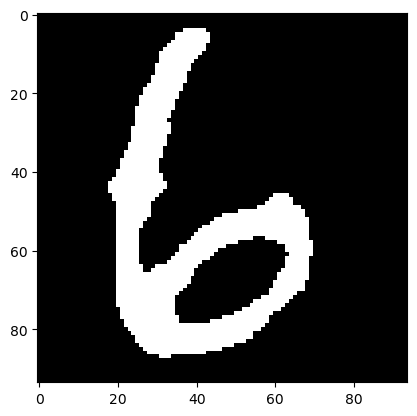

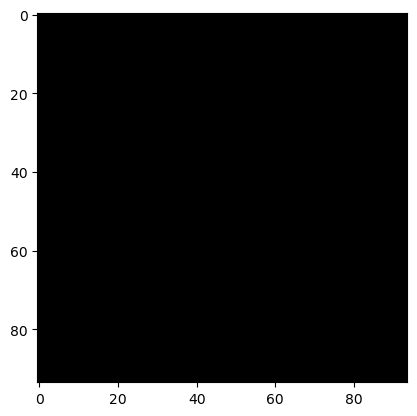

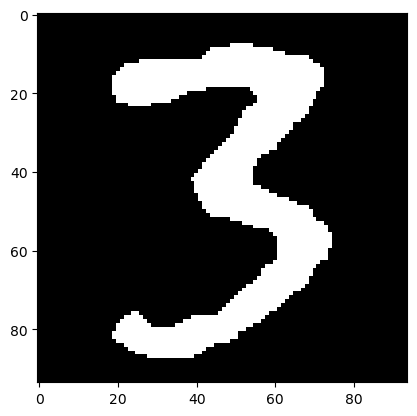

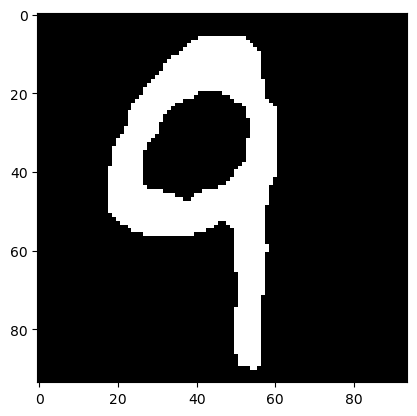

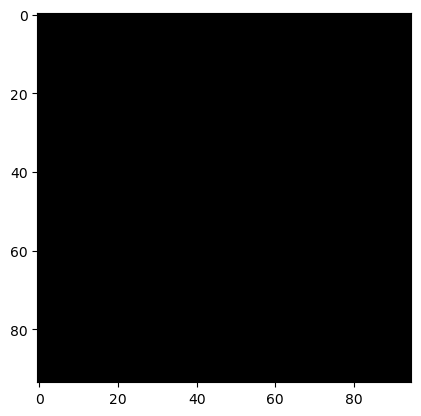

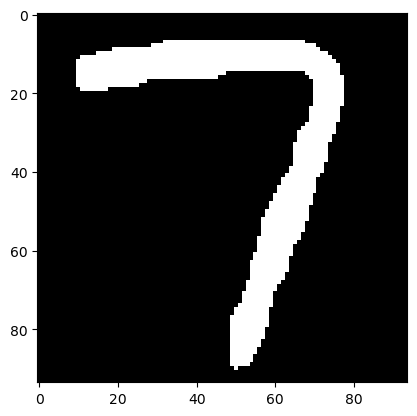

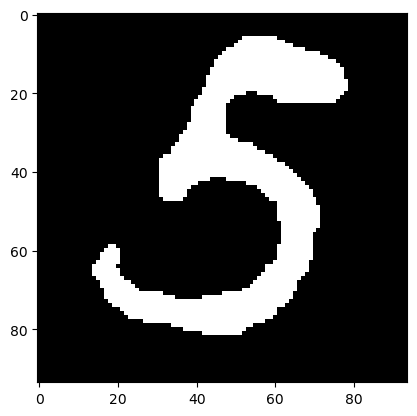

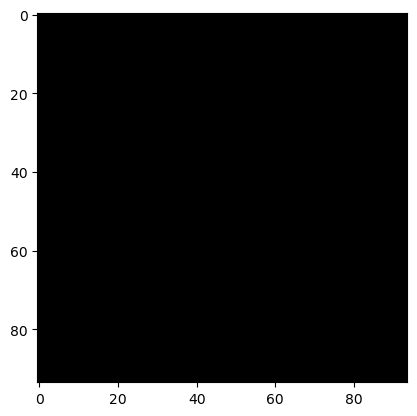

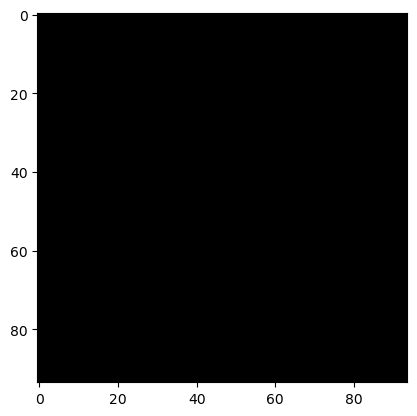

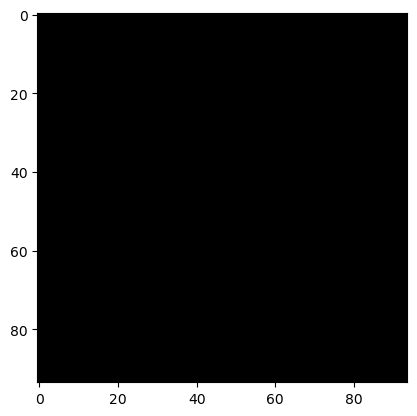

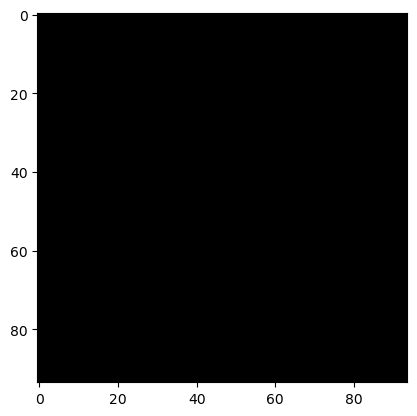

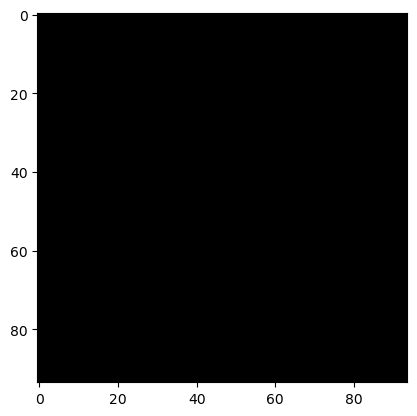

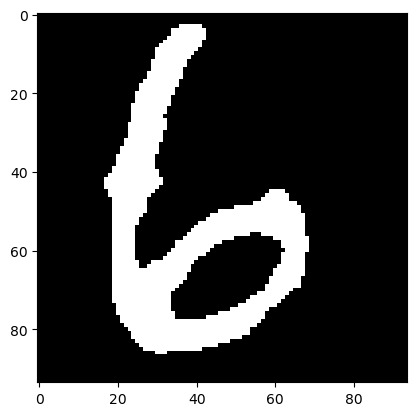

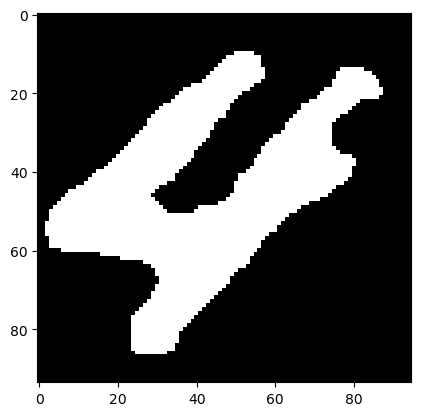

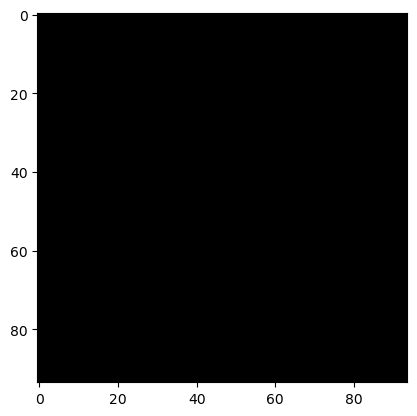

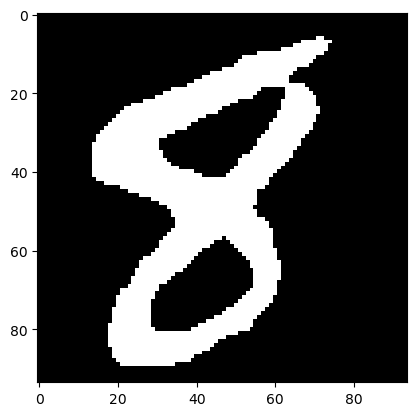

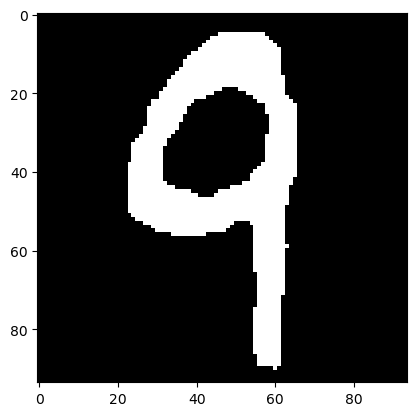

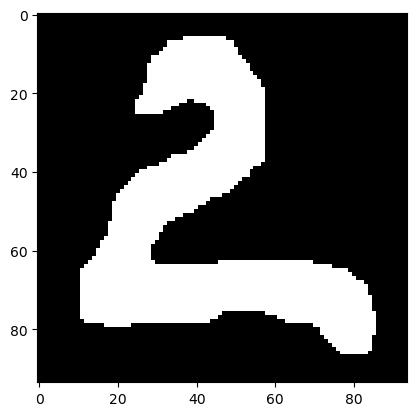

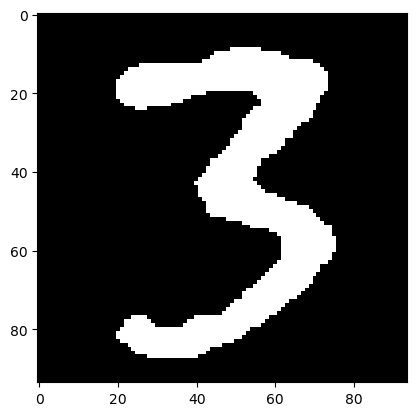

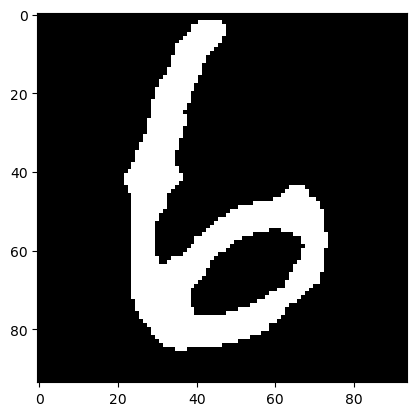

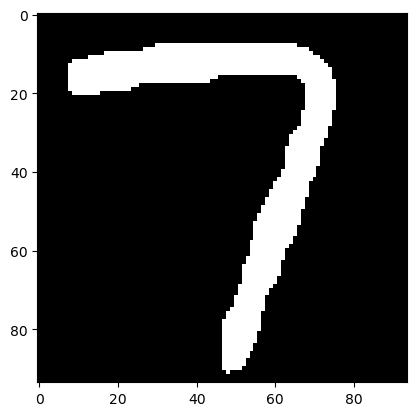

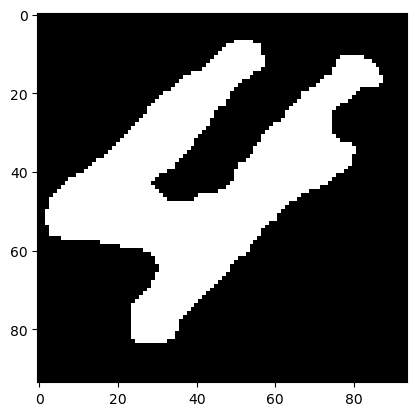

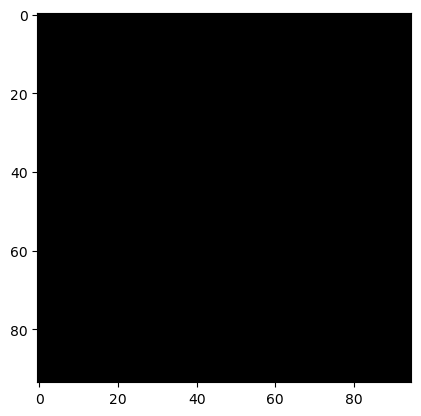

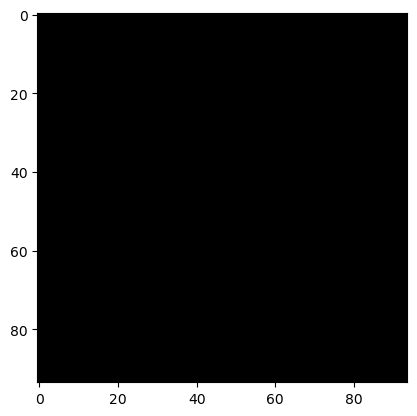

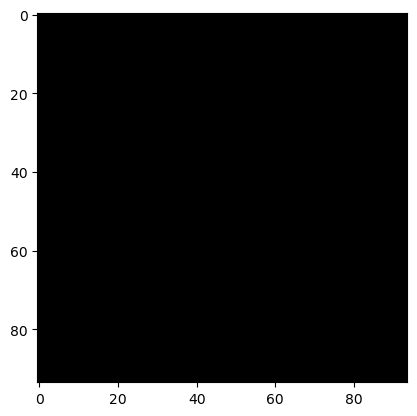

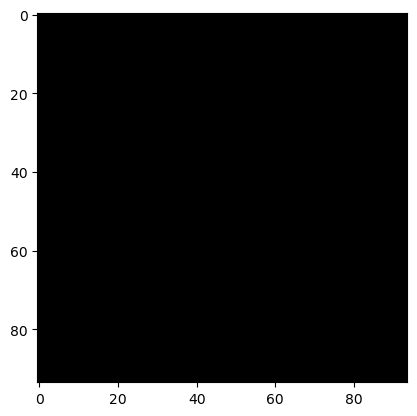

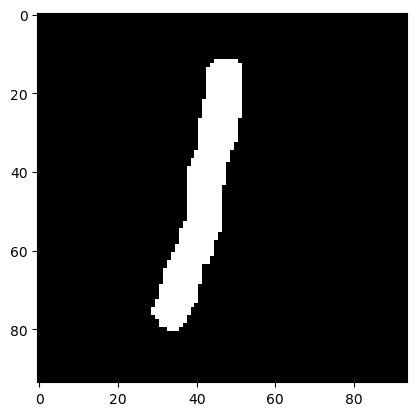

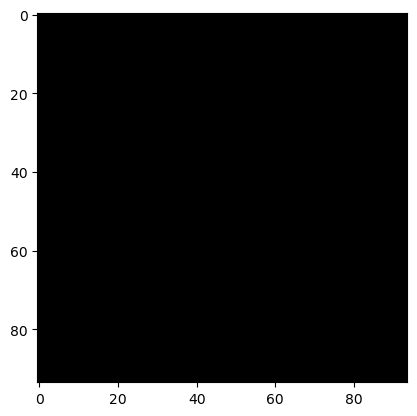

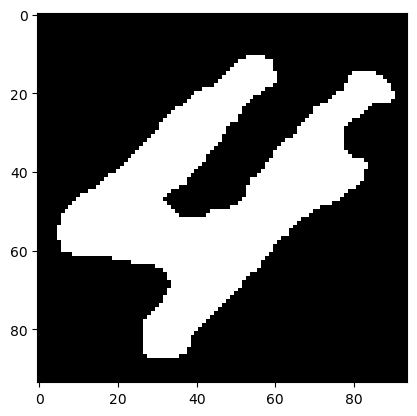

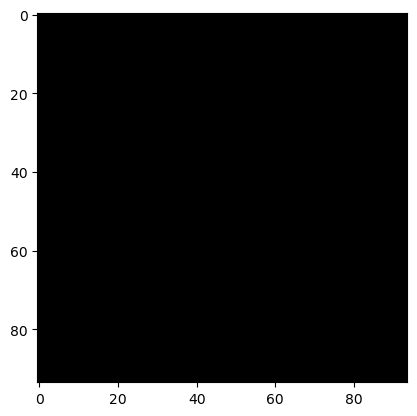

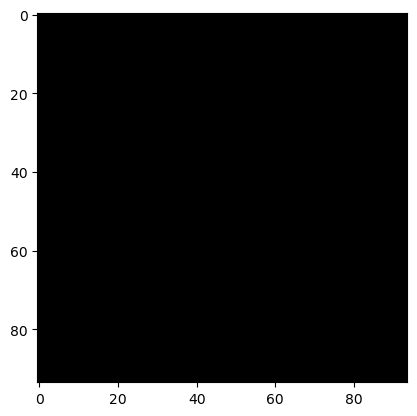

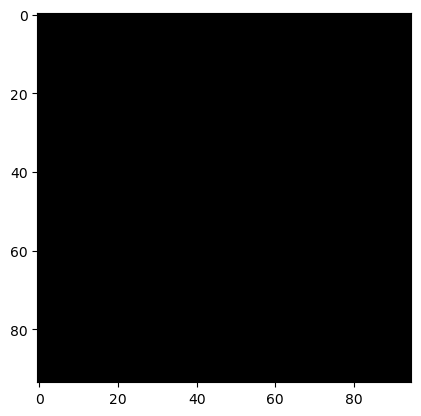

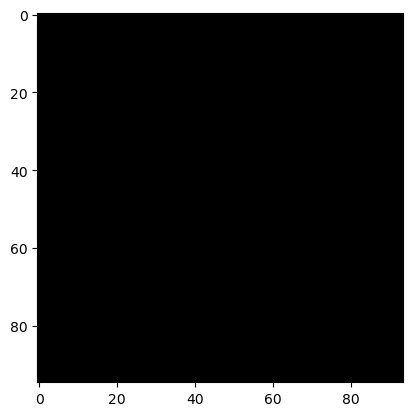

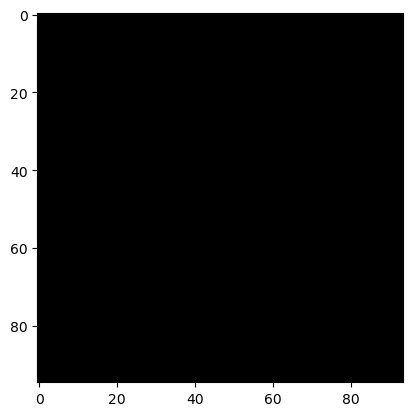

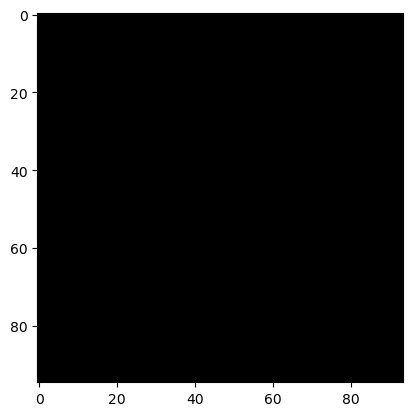

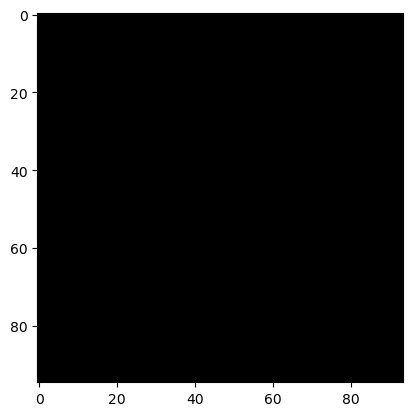

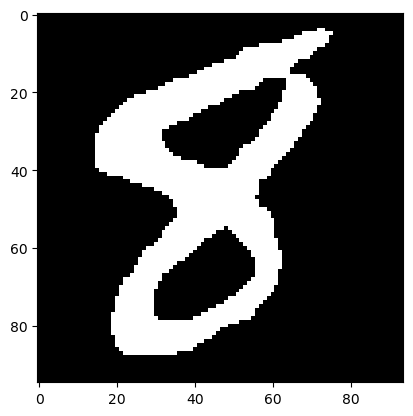

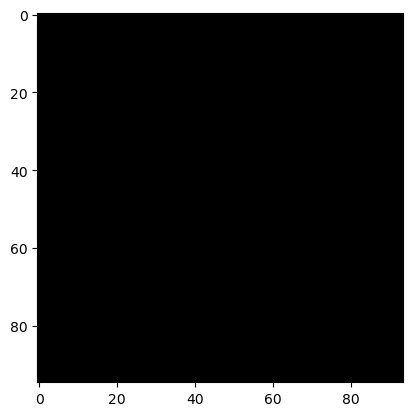

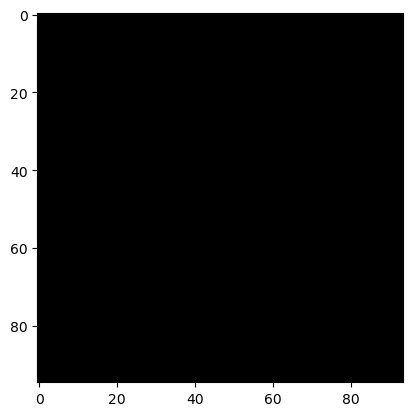

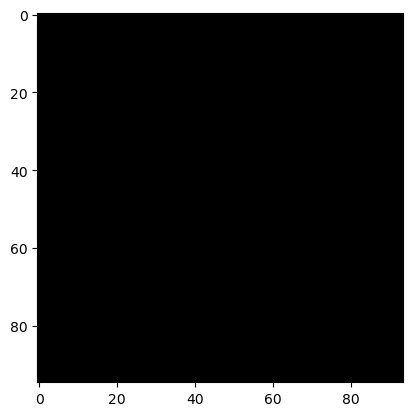

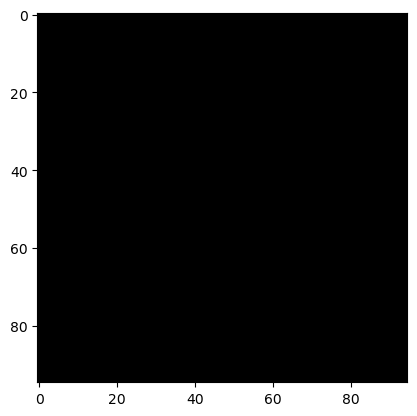

In [2]:
image = cv2.imread("images/image_1.png", cv2.IMREAD_GRAYSCALE)

width = (x2 - x1) / 9
length = (y2 - y1) / 9
rectangles = []
for i in range(9):
    for j in range(9):
        upper_left_x = int(x1 + width * j) + 10
        upper_left_y = int(y1 + length * i) + 10
        lower_right_x = int(x1 + width * (j + 1)) - 10
        lower_right_y = int(y1 + length * (i + 1)) - 10
        
        temp = image[upper_left_y: lower_right_y, upper_left_x: lower_right_x]
        
        _, temp = cv2.threshold(temp, 100, 255, 1)
        plt.imshow(temp, cmap = "gray")
        plt.show()
        rectangles.append(temp)

# Import MNIST digit dataset

In [3]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Length of training set: {len(x_train)}")
print(f"Length of testing set: {len(x_test)}")

Length of training set: 60000
Length of testing set: 10000


In [4]:
x_train[0].shape

(28, 28)

In [5]:
import numpy as np

x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Add blank data with noise into dataset

In [6]:
import random
import numpy as np

for i, y in enumerate(y_train):
    if (y == 0):
        # random the number of noise
        number = random.randint(0, 160)
        # initial blank image
        blank = np.zeros((28, 28))
#         for _ in range(number):
#             # random the place of the noise
#             place = random.randint(0, 28 * 28 - 1)
#             blank[place // 28][place % 28] = random.randint(1, 255)

        x_train[i] = blank.copy()
#     else:
#         # random the number of noise
#         number = random.randint(0, 160)
#         for _ in range(number):
#             # random the place of the noise
#             place = random.randint(0, 28 * 28 - 1)
#             x_train[place // 28][place % 28] = random.randint(1, 255)

In [7]:
import random
import numpy as np

for i, y in enumerate(y_test):
    if (y == 0):
        # random the number of noise
        number = random.randint(0, 40)
        # initial blank image
        blank = np.zeros((28, 28))
#         for _ in range(number):
#             # random the place of the noise
#             place = random.randint(0, 28 * 28 - 1)
#             blank[place // 28][place % 28] = random.randint(1, 255)

        x_test[i] = blank.copy()
#     else:
#         # random the number of noise
#         number = random.randint(0, 40)
#         for _ in range(number):
#             # random the place of the noise
#             place = random.randint(0, 28 * 28 - 1)
#             x_test[place // 28][place % 28] = random.randint(1, 255)

# Applying one-hot encoding

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
x_test.shape

(10000, 28, 28)

In [10]:
from keras.utils import np_utils

# reshape two-dimesion to one-dimesion
x_train = x_train.reshape(60000, 784).astype("float32")
x_test = x_test.reshape(10000, 784).astype("float32")

# normalization
x_train = x_train / 255
x_test = x_test / 255

# one-hot encoding
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# Construct model

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(units = 1000, input_dim = 784, kernel_initializer = "normal", activation = "relu"))
model.add(Dropout(0.4))
model.add(Dense(units = 1000, input_dim = 784, kernel_initializer = "normal", activation = "relu"))
model.add(Dropout(0.4))
model.add(Dense(units = 10, kernel_initializer = "normal", activation = "softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              785000    
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense_1 (Dense)             (None, 1000)              1001000   
                                                                 
 dropout_1 (Dropout)         (None, 1000)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                10010     
                                                                 
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________


# Training model

In [12]:
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

history = model.fit(x = x_train, y = y_train,
            validation_split = 0.2, epochs = 10, batch_size = 200, verbose = 2)

Epoch 1/10


2023-11-30 13:47:06.240182: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


240/240 - 3s - loss: 0.3330 - accuracy: 0.9078 - val_loss: 0.1119 - val_accuracy: 0.9643 - 3s/epoch - 13ms/step
Epoch 2/10
240/240 - 3s - loss: 0.1227 - accuracy: 0.9622 - val_loss: 0.0933 - val_accuracy: 0.9714 - 3s/epoch - 12ms/step
Epoch 3/10
240/240 - 3s - loss: 0.0883 - accuracy: 0.9721 - val_loss: 0.0781 - val_accuracy: 0.9745 - 3s/epoch - 12ms/step
Epoch 4/10
240/240 - 3s - loss: 0.0686 - accuracy: 0.9786 - val_loss: 0.0846 - val_accuracy: 0.9749 - 3s/epoch - 12ms/step
Epoch 5/10
240/240 - 3s - loss: 0.0613 - accuracy: 0.9799 - val_loss: 0.0714 - val_accuracy: 0.9778 - 3s/epoch - 13ms/step
Epoch 6/10
240/240 - 3s - loss: 0.0469 - accuracy: 0.9846 - val_loss: 0.0768 - val_accuracy: 0.9778 - 3s/epoch - 13ms/step
Epoch 7/10
240/240 - 3s - loss: 0.0422 - accuracy: 0.9859 - val_loss: 0.0724 - val_accuracy: 0.9797 - 3s/epoch - 13ms/step
Epoch 8/10
240/240 - 3s - loss: 0.0387 - accuracy: 0.9871 - val_loss: 0.0763 - val_accuracy: 0.9791 - 3s/epoch - 13ms/step
Epoch 9/10
240/240 - 3s - l

# Accuracy plot and loss plot

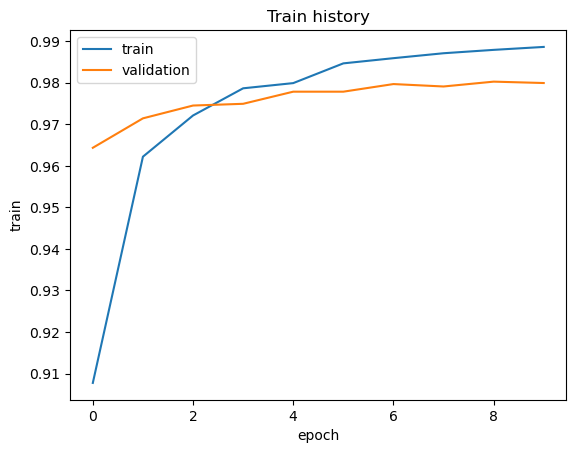

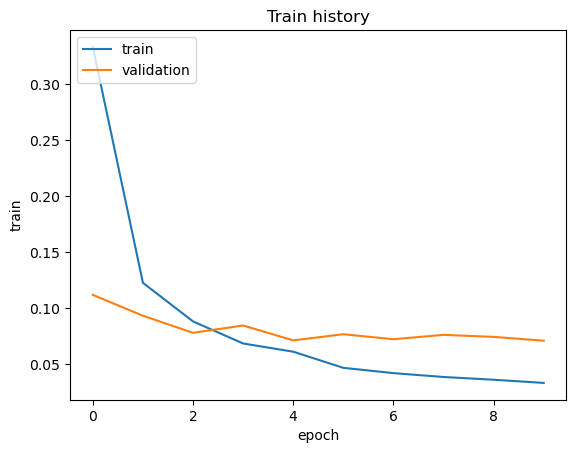

In [13]:
import matplotlib.pyplot as plt

def display_history(history, train, validation):
    plt.plot(history.history[train])
    plt.plot(history.history[validation])
    plt.title("Train history")
    plt.ylabel("train")
    plt.xlabel("epoch")

    plt.legend(["train", "validation"], loc = "upper left")
    plt.show()

display_history(history, "accuracy", "val_accuracy")
display_history(history, "loss", "val_loss")

# Accuracy

In [14]:
scores = model.evaluate(x_test, y_test)
print(f"Accuracy: {scores[1]}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0646 - accuracy: 0.9819
Accuracy: 0.9818999767303467


# Confusion matrix

In [15]:
import pandas as pd

prediction = model.predict(x_test)
prediction = prediction.tolist()
for i, p in enumerate(prediction):
    prediction[i] = p.index(max(p))
y_test = y_test.tolist()
for i, y in enumerate(y_test):
    y_test[i] = y.index(max(y))
    
pd.crosstab(y_test, prediction, rownames = ["label"], colnames = ["prediction"])

313/313 [==============================] - 1s 2ms/step


prediction,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,980,0,0,0,0,0,0,0,0,0
1,0,1129,3,0,0,1,1,0,1,0
2,0,1,1016,3,2,0,2,4,4,0
3,0,1,1,992,0,9,0,3,4,0
4,0,0,0,1,968,0,7,2,1,3
5,0,0,0,4,1,880,4,0,2,1
6,0,3,0,2,2,10,939,0,2,0
7,0,2,8,1,3,1,0,1007,3,3
8,0,0,4,5,4,6,2,3,948,2


# Use model to predict all the rectangles' result to make two-dimesional matrix

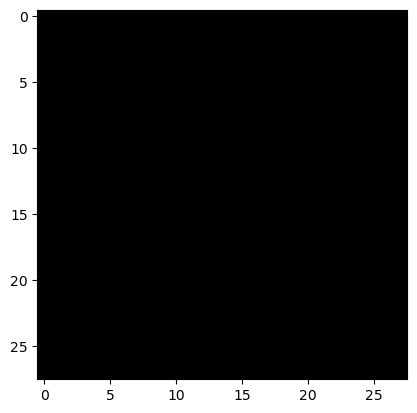

1/1 [==============================] - 0s 7ms/step
0


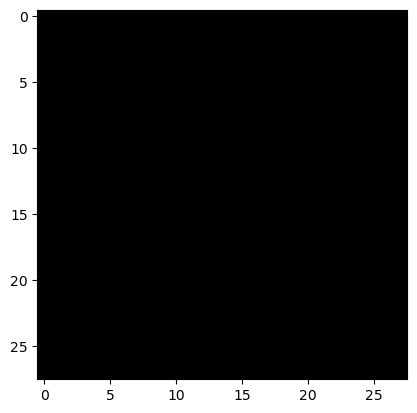

1/1 [==============================] - 0s 8ms/step
0


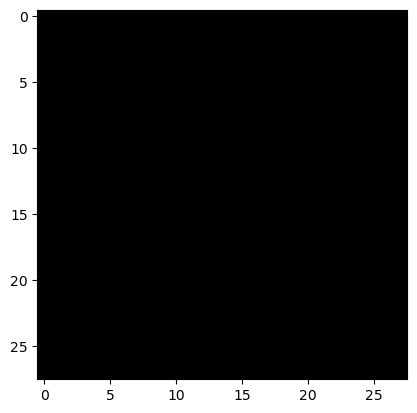

1/1 [==============================] - 0s 9ms/step
0


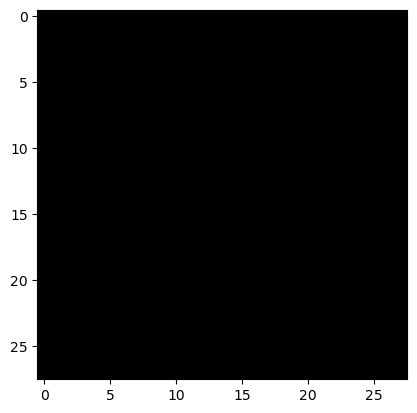

1/1 [==============================] - 0s 7ms/step
0


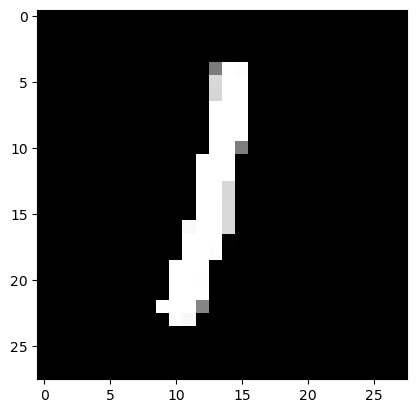

1/1 [==============================] - 0s 7ms/step
1


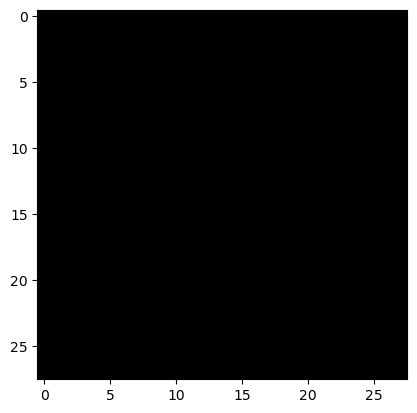

1/1 [==============================] - 0s 6ms/step
0


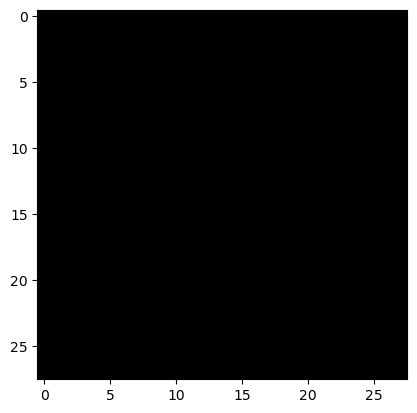

1/1 [==============================] - 0s 6ms/step
0


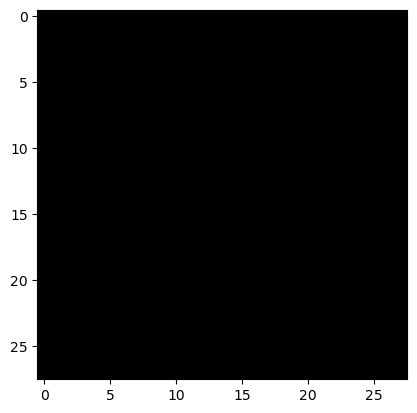

1/1 [==============================] - 0s 8ms/step
0


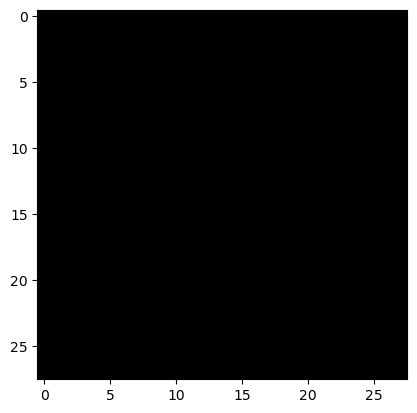

1/1 [==============================] - 0s 7ms/step
0


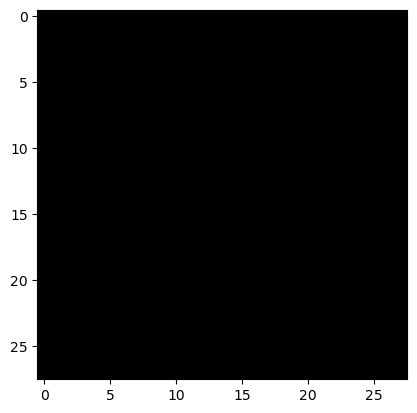

1/1 [==============================] - 0s 7ms/step
0


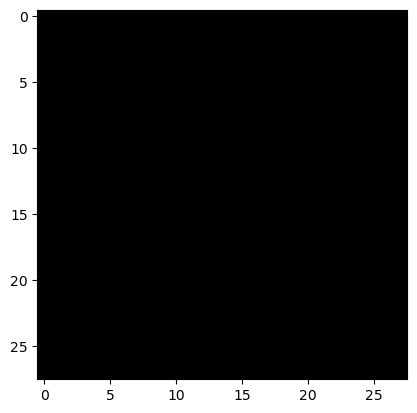

1/1 [==============================] - 0s 7ms/step
0


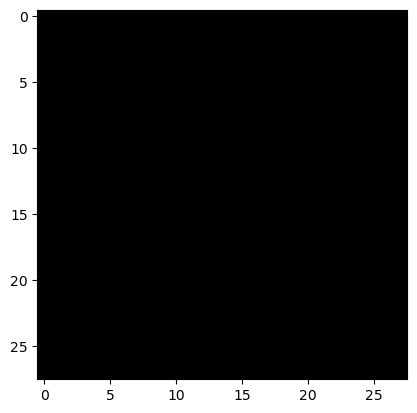

1/1 [==============================] - 0s 6ms/step
0


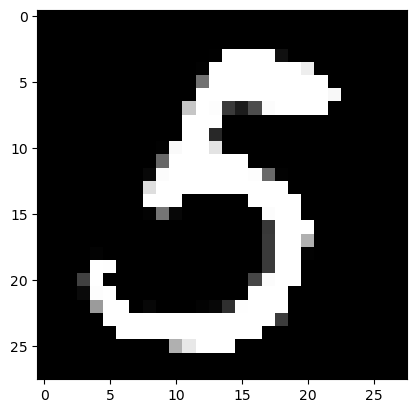

1/1 [==============================] - 0s 9ms/step
5


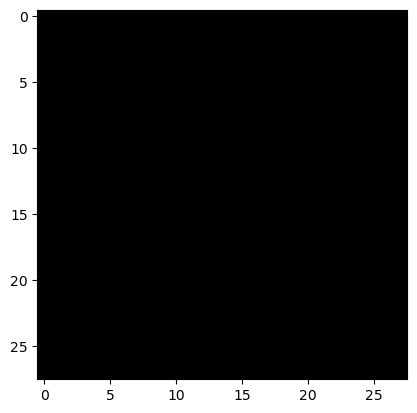

1/1 [==============================] - 0s 7ms/step
0


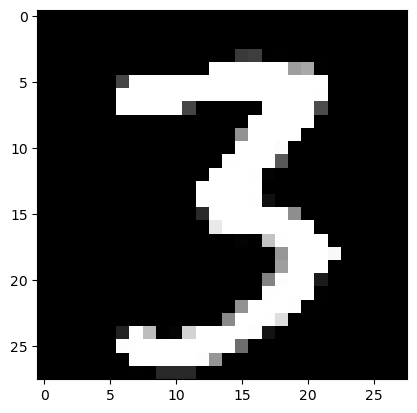

1/1 [==============================] - 0s 7ms/step
3


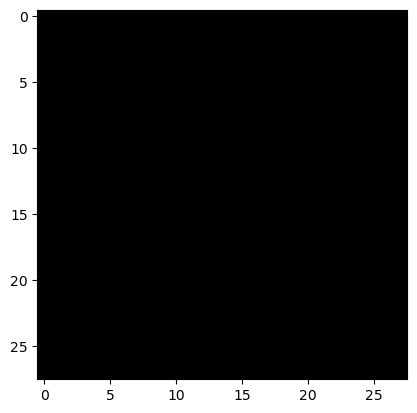

1/1 [==============================] - 0s 7ms/step
0


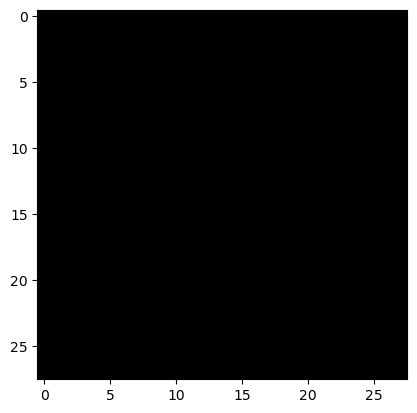

1/1 [==============================] - 0s 7ms/step
0


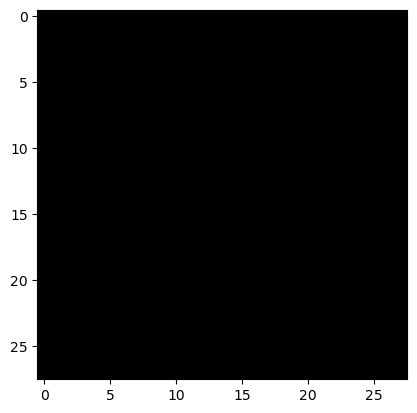

1/1 [==============================] - 0s 8ms/step
0


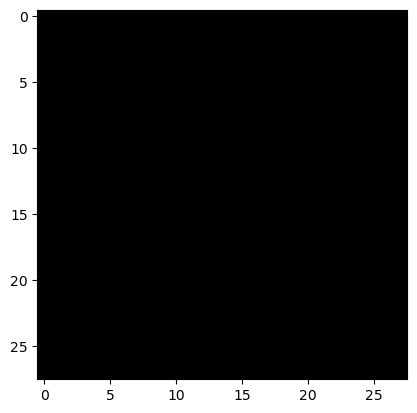

1/1 [==============================] - 0s 7ms/step
0


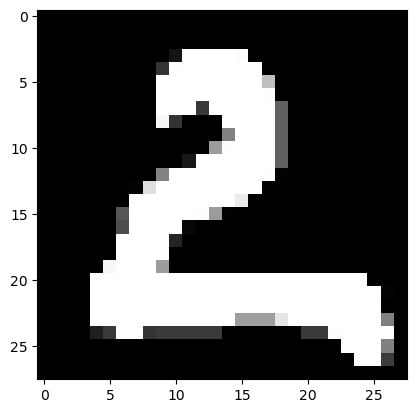

1/1 [==============================] - 0s 7ms/step
2


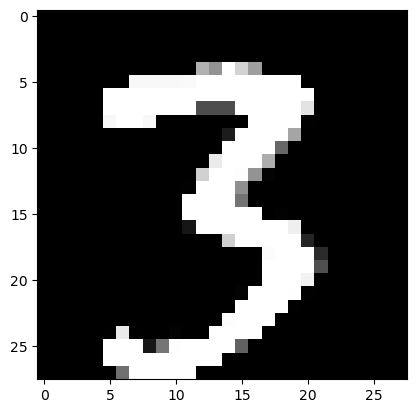

1/1 [==============================] - 0s 8ms/step
3


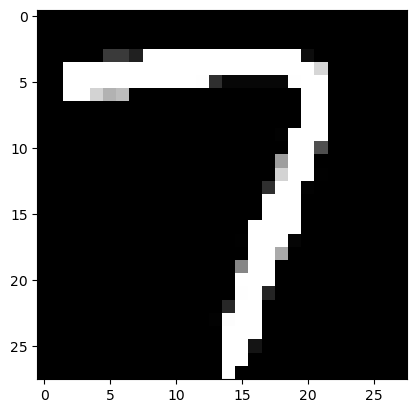

1/1 [==============================] - 0s 8ms/step
2


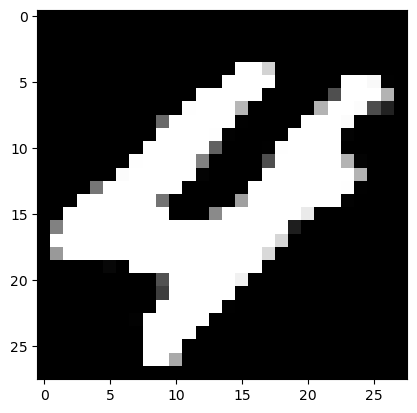

1/1 [==============================] - 0s 7ms/step
4


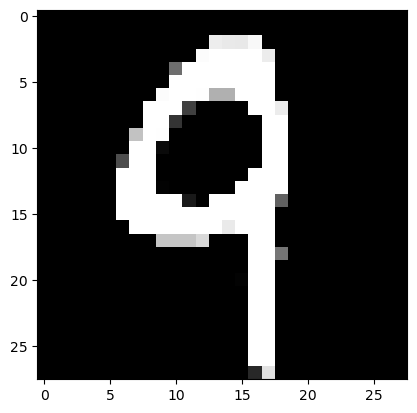

1/1 [==============================] - 0s 7ms/step
9


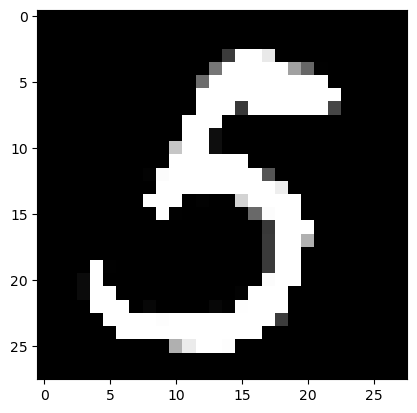

1/1 [==============================] - 0s 7ms/step
5


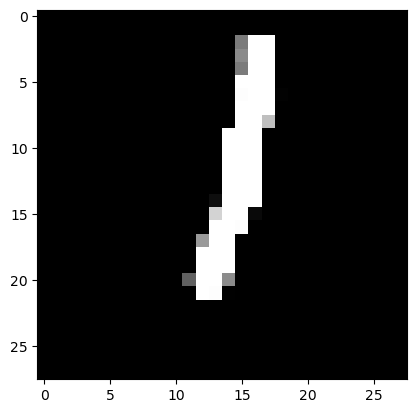

1/1 [==============================] - 0s 9ms/step
1


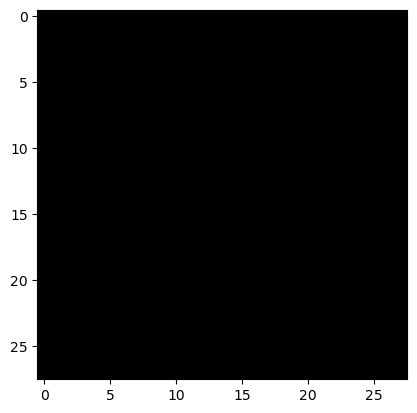

1/1 [==============================] - 0s 7ms/step
0


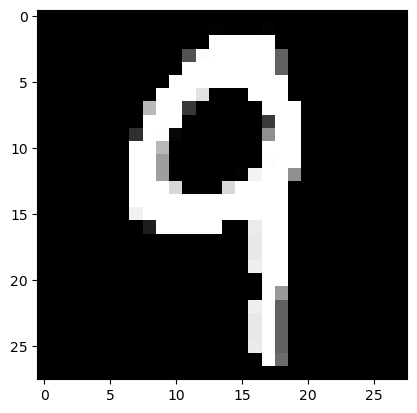

1/1 [==============================] - 0s 6ms/step
9


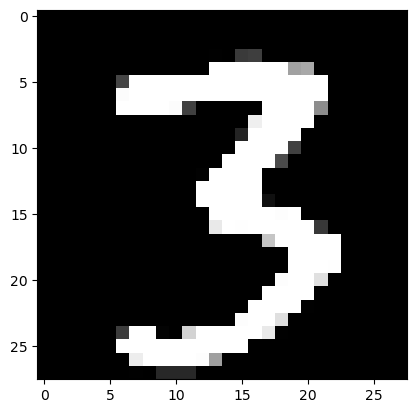

1/1 [==============================] - 0s 7ms/step
3


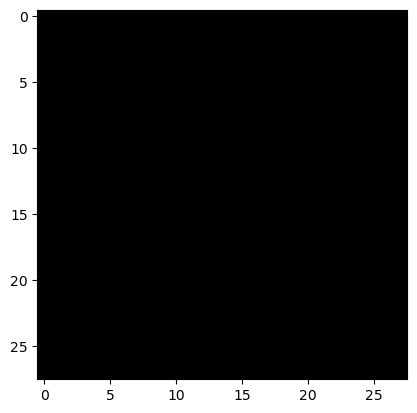

1/1 [==============================] - 0s 7ms/step
0


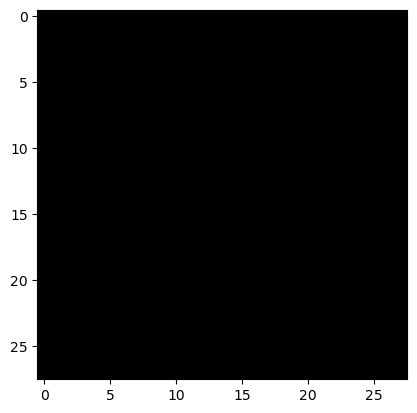

1/1 [==============================] - 0s 8ms/step
0


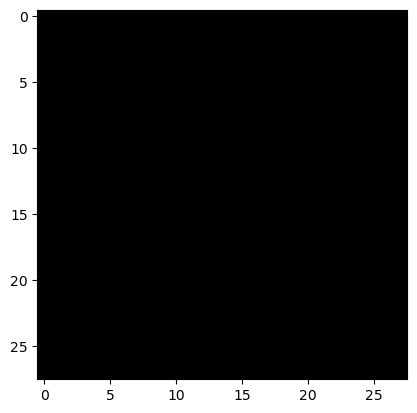

1/1 [==============================] - 0s 9ms/step
0


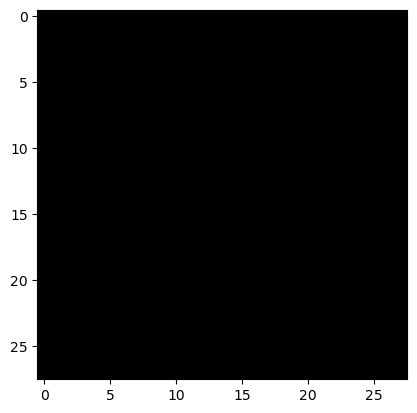

1/1 [==============================] - 0s 7ms/step
0


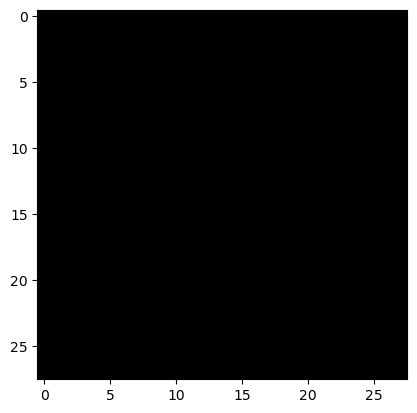

1/1 [==============================] - 0s 7ms/step
0


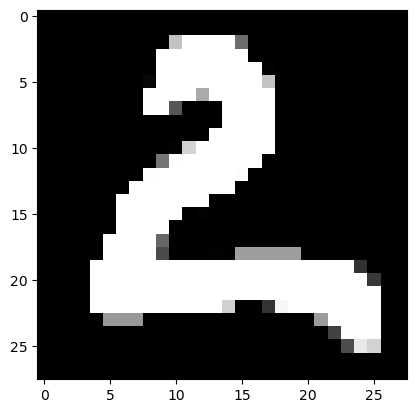

1/1 [==============================] - 0s 7ms/step
2


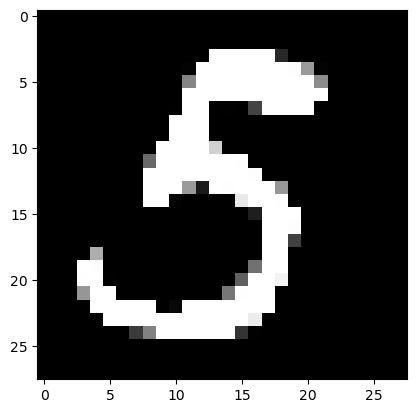

1/1 [==============================] - 0s 8ms/step
5


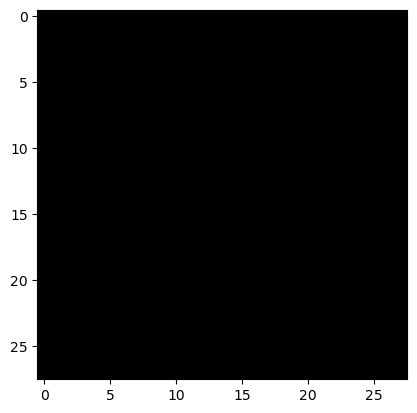

1/1 [==============================] - 0s 7ms/step
0


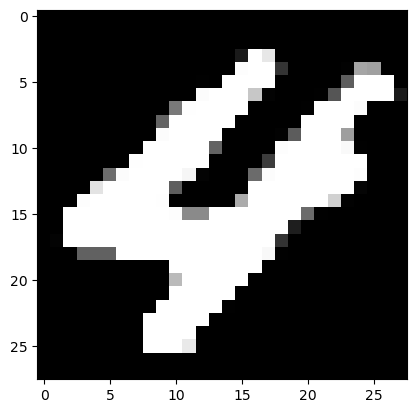

1/1 [==============================] - 0s 7ms/step
4


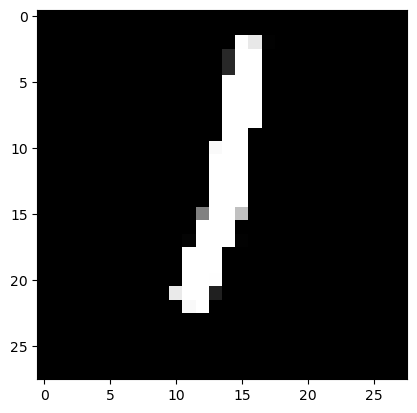

1/1 [==============================] - 0s 7ms/step
1


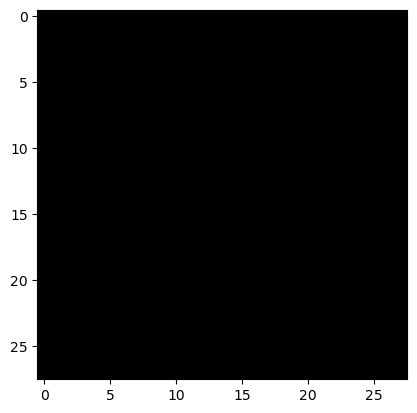

1/1 [==============================] - 0s 8ms/step
0


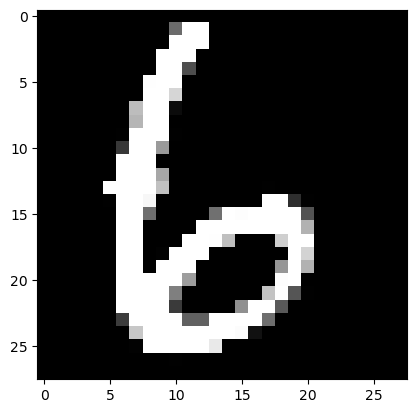

1/1 [==============================] - 0s 7ms/step
6


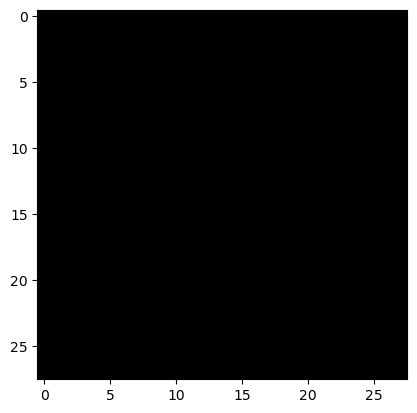

1/1 [==============================] - 0s 6ms/step
0


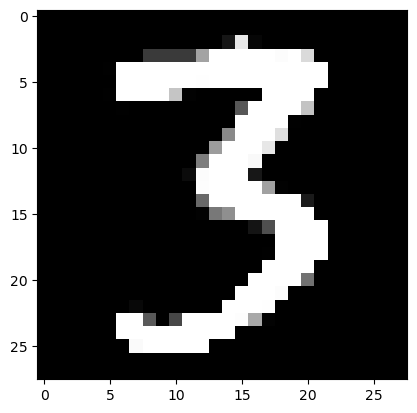

1/1 [==============================] - 0s 7ms/step
3


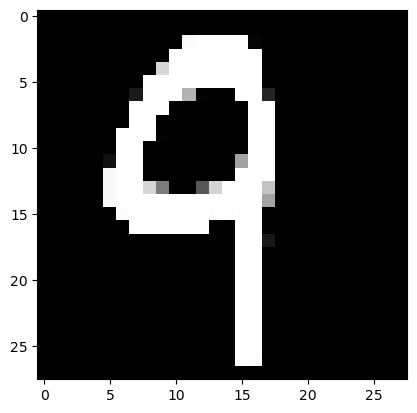

1/1 [==============================] - 0s 6ms/step
6


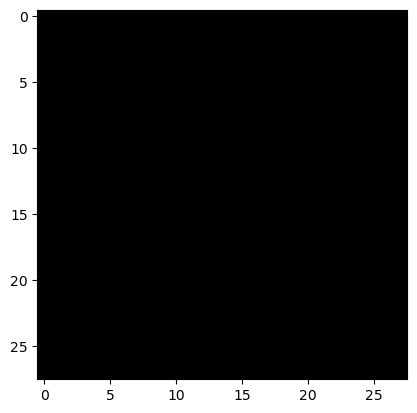

1/1 [==============================] - 0s 7ms/step
0


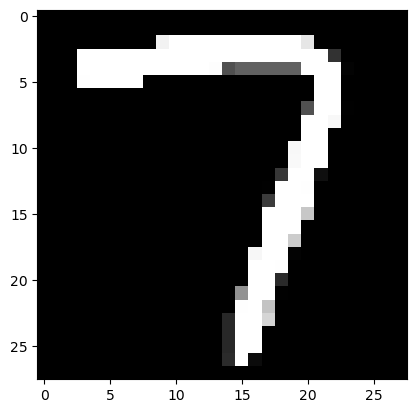

1/1 [==============================] - 0s 6ms/step
2


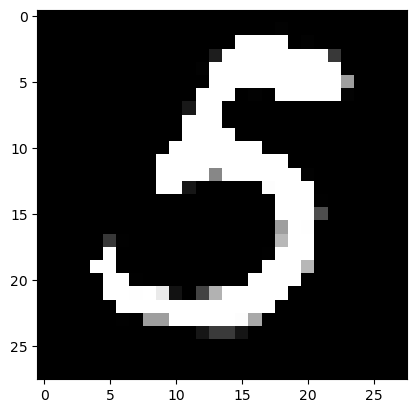

1/1 [==============================] - 0s 7ms/step
5


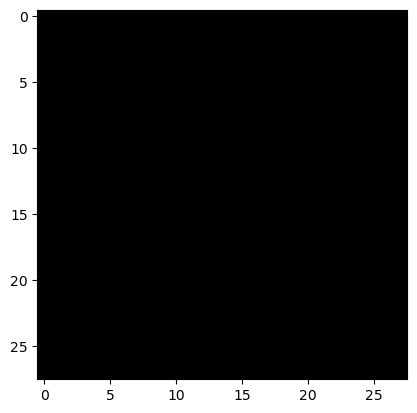

1/1 [==============================] - 0s 7ms/step
0


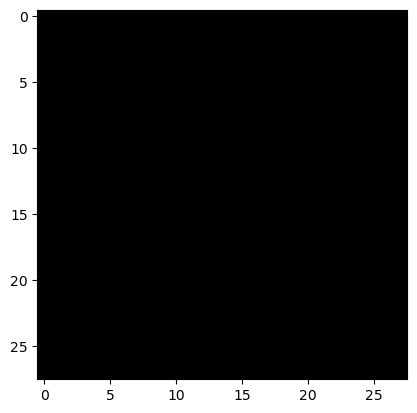

1/1 [==============================] - 0s 7ms/step
0


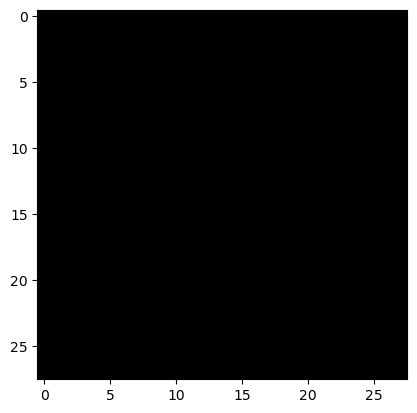

1/1 [==============================] - 0s 7ms/step
0


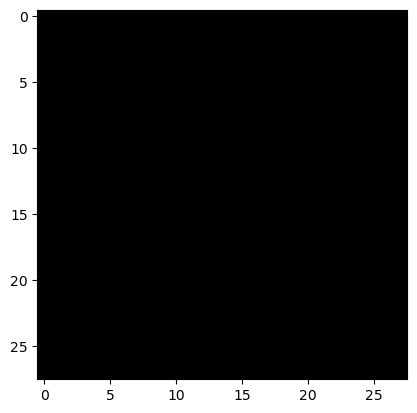

1/1 [==============================] - 0s 9ms/step
0


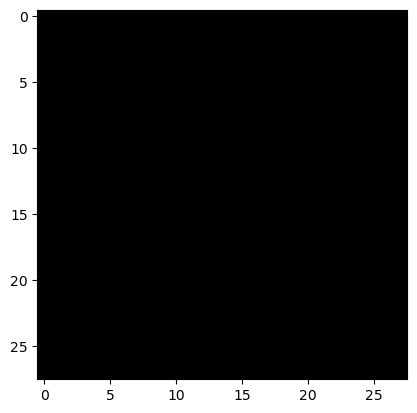

1/1 [==============================] - 0s 7ms/step
0


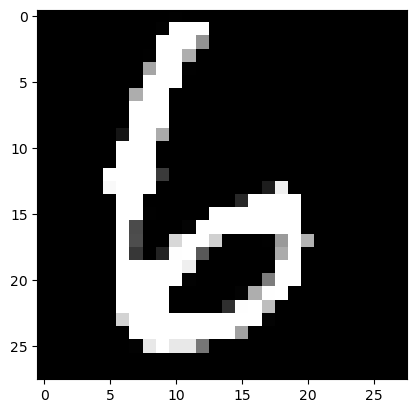

1/1 [==============================] - 0s 7ms/step
6


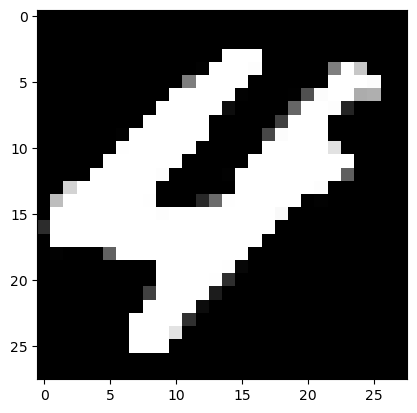

1/1 [==============================] - 0s 7ms/step
4


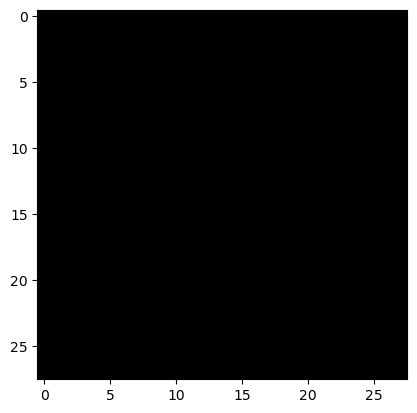

1/1 [==============================] - 0s 9ms/step
0


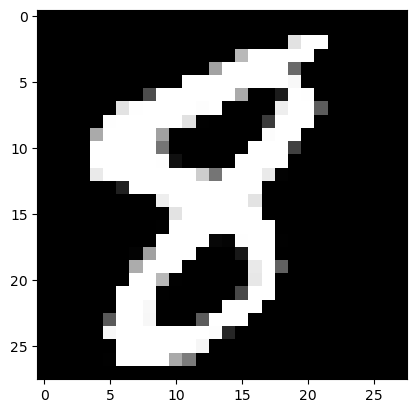

1/1 [==============================] - 0s 7ms/step
8


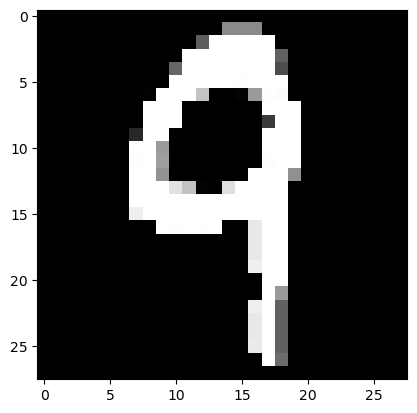

1/1 [==============================] - 0s 7ms/step
9


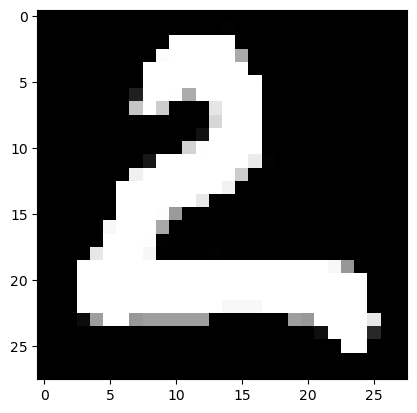

1/1 [==============================] - 0s 7ms/step
2


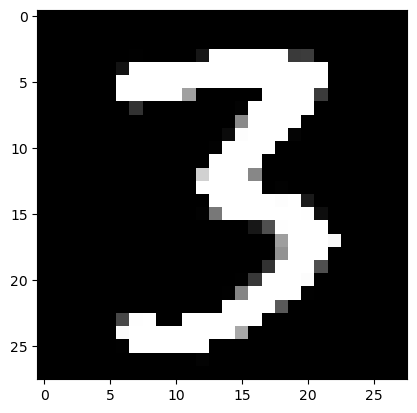

1/1 [==============================] - 0s 8ms/step
3


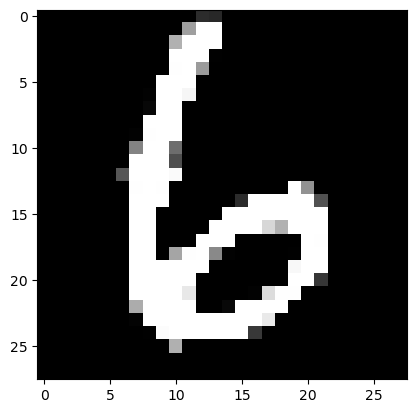

1/1 [==============================] - 0s 8ms/step
6


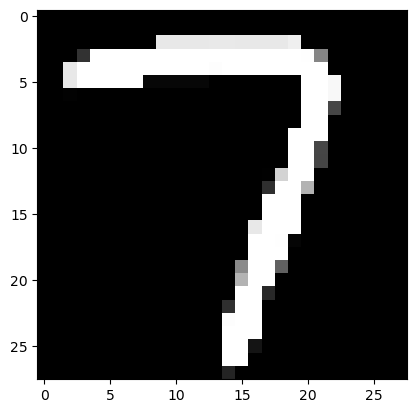

1/1 [==============================] - 0s 8ms/step
2


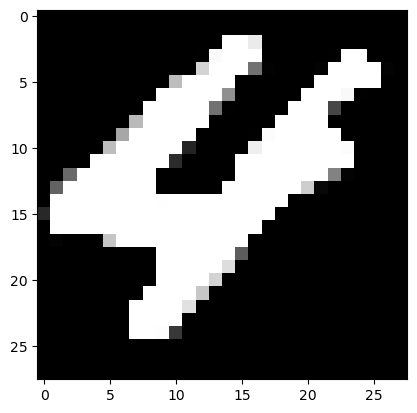

1/1 [==============================] - 0s 8ms/step
4


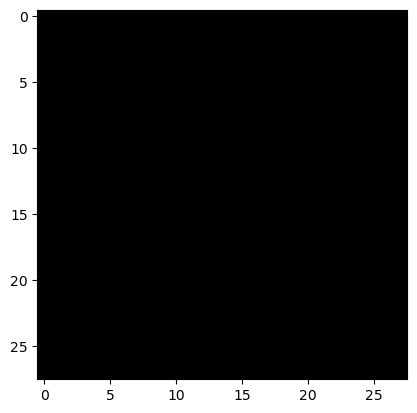

1/1 [==============================] - 0s 7ms/step
0


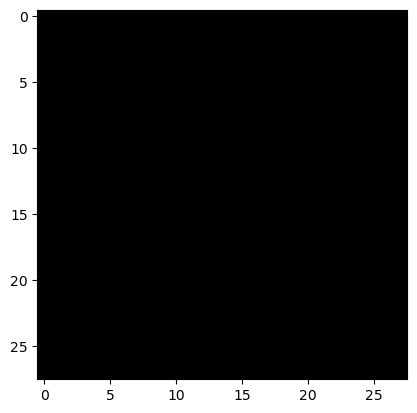

1/1 [==============================] - 0s 7ms/step
0


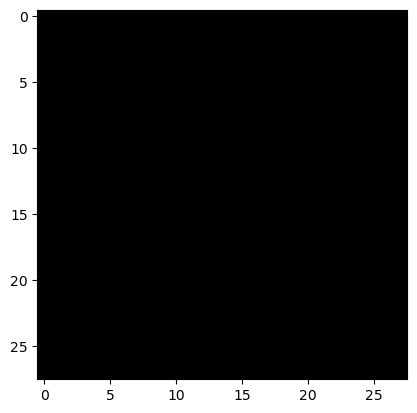

1/1 [==============================] - 0s 7ms/step
0


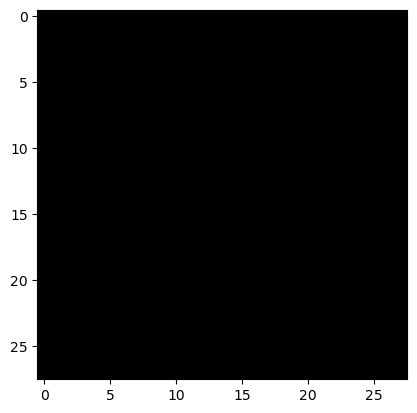

1/1 [==============================] - 0s 7ms/step
0


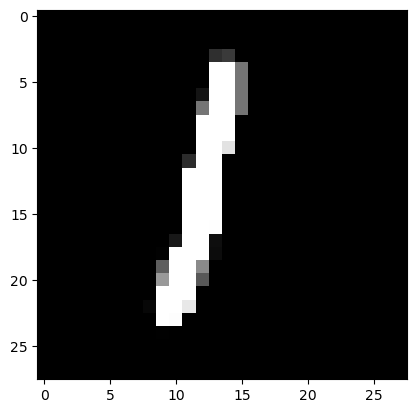

1/1 [==============================] - 0s 7ms/step
8


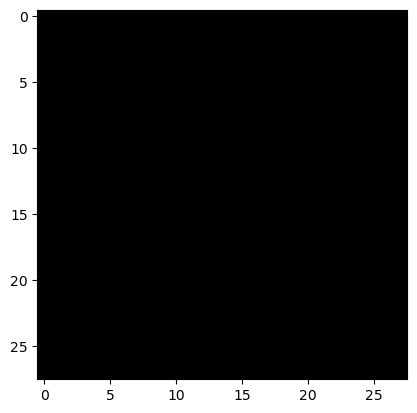

1/1 [==============================] - 0s 7ms/step
0


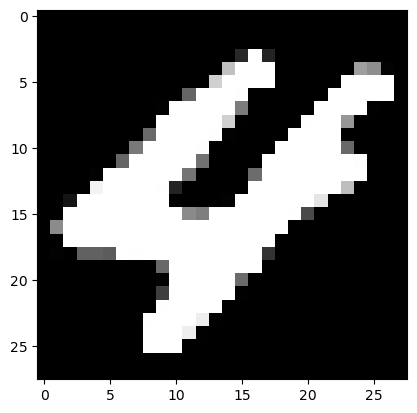

1/1 [==============================] - 0s 8ms/step
4


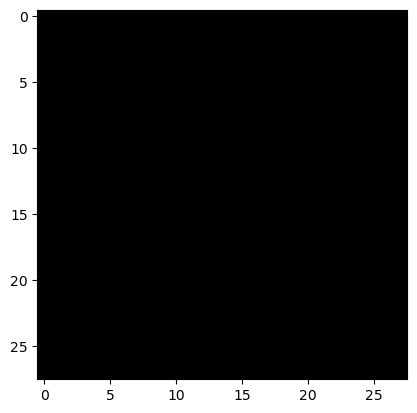

1/1 [==============================] - 0s 8ms/step
0


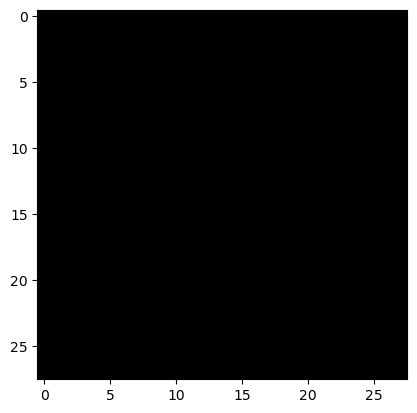

1/1 [==============================] - 0s 8ms/step
0


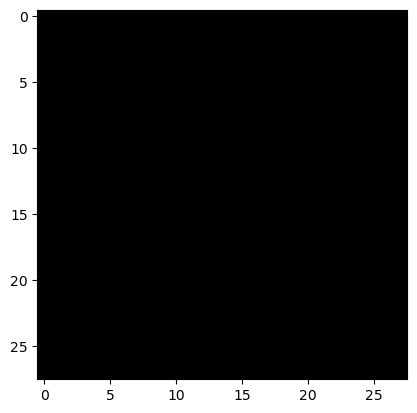

1/1 [==============================] - 0s 7ms/step
0


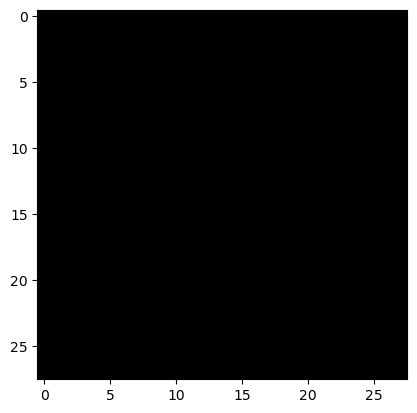

1/1 [==============================] - 0s 7ms/step
0


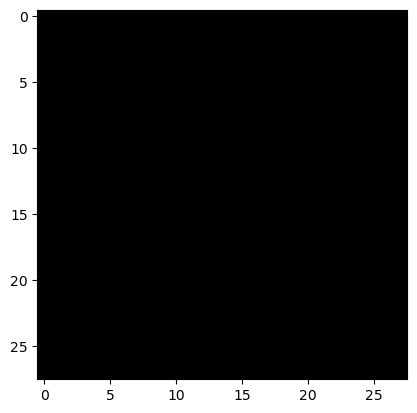

1/1 [==============================] - 0s 7ms/step
0


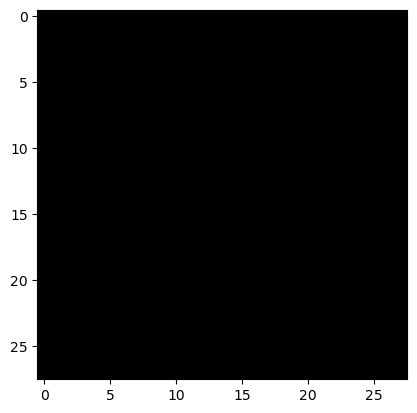

1/1 [==============================] - 0s 8ms/step
0


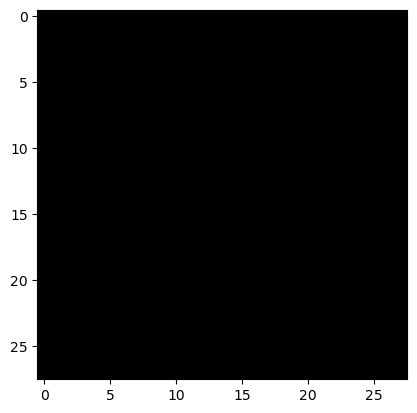

1/1 [==============================] - 0s 7ms/step
0


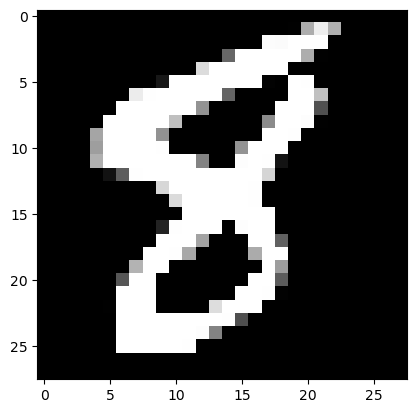

1/1 [==============================] - 0s 7ms/step
8


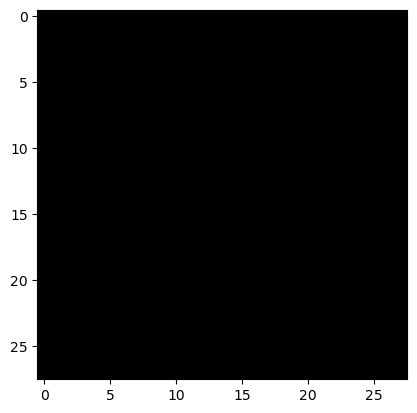

1/1 [==============================] - 0s 8ms/step
0


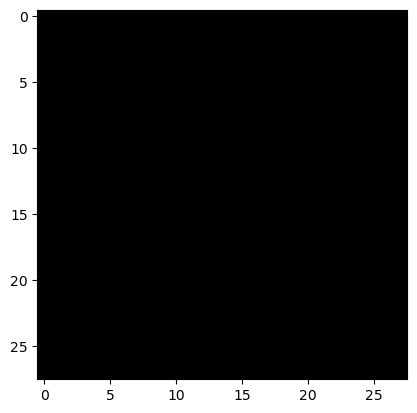

1/1 [==============================] - 0s 7ms/step
0


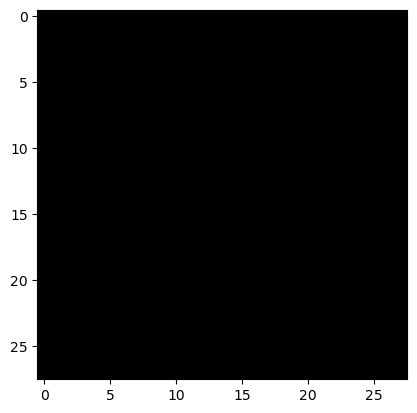

1/1 [==============================] - 0s 7ms/step
0


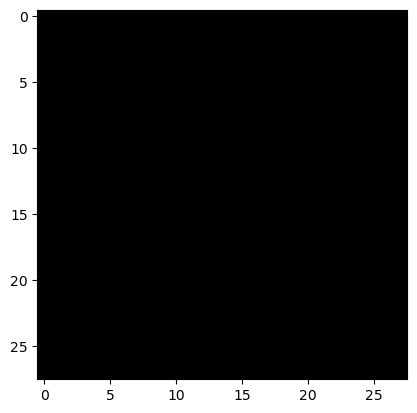

1/1 [==============================] - 0s 8ms/step
0


In [16]:
sudoku = []
for i in range(9):
    temp = []
    for j in range(9):
        r = rectangles[i * 9 + j]
        r = cv2.resize(r, (28, 28), interpolation = cv2.INTER_CUBIC)
        
        plt.imshow(r, cmap = "gray")
        plt.show()
        
        r = r.reshape(1, 784).astype("float32")
        r /= 255
        
        result = model.predict(r)[0]
        temp.append(np.argmax(result))
        
        print(np.argmax(result))
        
    sudoku.append(temp.copy())

In [17]:
for s in sudoku:
    print(s)

[0, 0, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 5, 0, 3, 0, 0, 0]
[0, 2, 3, 2, 4, 9, 5, 1, 0]
[9, 3, 0, 0, 0, 0, 0, 2, 5]
[0, 4, 1, 0, 6, 0, 3, 6, 0]
[2, 5, 0, 0, 0, 0, 0, 6, 4]
[0, 8, 9, 2, 3, 6, 2, 4, 0]
[0, 0, 0, 8, 0, 4, 0, 0, 0]
[0, 0, 0, 0, 8, 0, 0, 0, 0]


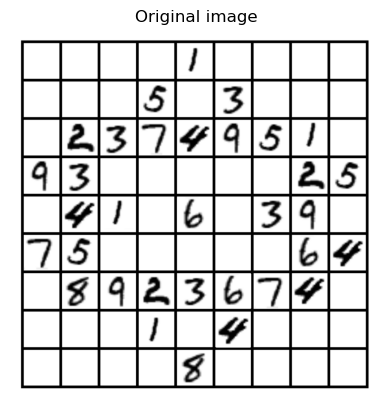

In [18]:
# load original image
image = cv2.imread("images/image_1.png")
plt.axis("off")
plt.title("Original image")
plt.imshow(image)
plt.show()

# Solve sudoku

In [19]:
sudoku = [[0, 0, 0, 0, 1, 0, 0, 0, 0],
          [0, 0, 0, 5, 0, 3, 0, 0, 0],
          [0, 2, 3, 7, 4, 9, 5, 1, 0],
          [9, 3, 0, 0, 0, 0, 0, 2, 5],
          [0, 4, 1, 0, 6, 0, 3, 9, 0],
          [7, 5, 0, 0, 0, 0, 0, 6, 4],
          [0, 8, 9, 2, 3, 6, 7, 4, 0],
          [0, 0, 0, 1, 0, 4, 0, 0, 0],
          [0, 0, 0, 0, 8, 0, 0, 0, 0]]

def solve():
    for i in range(9):
        for j in range(9):
            if (sudoku[i][j] == 0):
                for c in range(1, 10):
                    if (isValid(i, j, c)):
                        sudoku[i][j] = c
                        if (solve()):
                            return True
                        else:
                            sudoku[i][j] = 0
                return False
    return True
        
def isValid(row, col, c):
    for i in range(9):
        if (sudoku[i][col] == c):
            return False

        if (sudoku[row][i] == c):
            return False

        if (sudoku[3 * (row // 3) + (i // 3)][3 * (col // 3) + (i % 3)] == c):
            return False
    return True

solve()
sudoku

[[4, 9, 5, 6, 1, 8, 2, 7, 3],
 [1, 6, 7, 5, 2, 3, 4, 8, 9],
 [8, 2, 3, 7, 4, 9, 5, 1, 6],
 [9, 3, 6, 4, 7, 1, 8, 2, 5],
 [2, 4, 1, 8, 6, 5, 3, 9, 7],
 [7, 5, 8, 3, 9, 2, 1, 6, 4],
 [5, 8, 9, 2, 3, 6, 7, 4, 1],
 [6, 7, 2, 1, 5, 4, 9, 3, 8],
 [3, 1, 4, 9, 8, 7, 6, 5, 2]]